In [6]:
#Exercise 1
from sklearn.linear_model import LogisticRegression
import numpy as np
X = [[0],[0.1],[0.2], [1],[1.1],[1.2], [1.3]]
y = [0,0,0,1,1,1,0]
model = LogisticRegression()
model.fit(X,y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [3]:
x_pred= [[0.5]]
predictions = model.predict(x_pred)
print(predictions)

[0]


In [4]:
print("probability :",model.predict_proba(x_pred))


probability : [[0.61450206 0.38549794]]


In [5]:
print(f"coef_ :{model.coef_} \nintercept_ :{model.intercept_}\nscore : {model.score(X,y)}")

coef_ :[[0.81793264]] 
intercept_ :[-0.87524276]
score : 0.7142857142857143


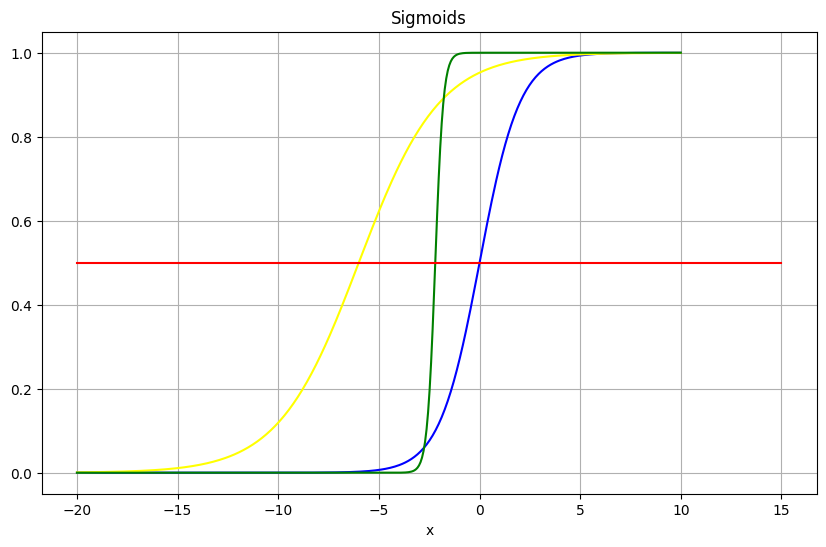

In [8]:
#Exercise 2

import matplotlib.pyplot as plt

def sigmoid(x): 
    return 1/(1+np.exp(-x))
def sigmoid1(x):
    return 1/(1+np.exp(-(0.5*x+3)))
def sigmoid2(x):
    return 1/(1+np.exp(-(5*x+11)))


x = np.linspace(-20,10,400)
y_standard = sigmoid(x)
y1 =sigmoid1(x)
y2 =sigmoid2(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_standard, label='Standard Sigmoid', color='blue')
plt.plot(x, y1, label='Sigmoid1: 0.5*x + 3', color='yellow')
plt.plot(x, y2, label='Sigmoid2: 5*x + 11', color='green')
plt.plot([-20, 15], [0.5, 0.5], 'r-', label='Probability = 0.5')
plt.xlabel('x')
plt.title('Sigmoids')
plt.grid(True)
plt.show()


In [9]:
#Exercise 3
from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)
print(X.shape)
print(y.shape)


(100, 1)
(100,)


Text(0.5, 1.0, '1D Classification Data')

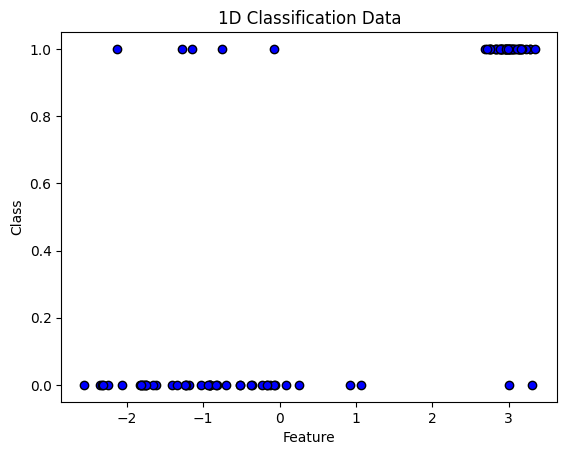

In [10]:
plt.scatter(X, y, c='blue', edgecolor='k')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('1D Classification Data')

In [11]:
def predict_probability(coefs, intercept, X):
    coef, inter = coefs[0][0], intercept[0]
    z = coef * X + inter
    probabilities = 1 / (1 + np.exp(-z))
    return probabilities

def predict_class(coefs, intercept, X):
    probs = predict_probability(coefs, intercept, X)
    return (probs >= 0.5).astype(int)

print(np.allclose(model.predict_proba(X)[:, 1], predict_probability(model.coef_, model.intercept_, X.ravel())))
print(np.array_equal(model.predict(X), predict_class(model.coef_, model.intercept_, X.ravel())))



True
True


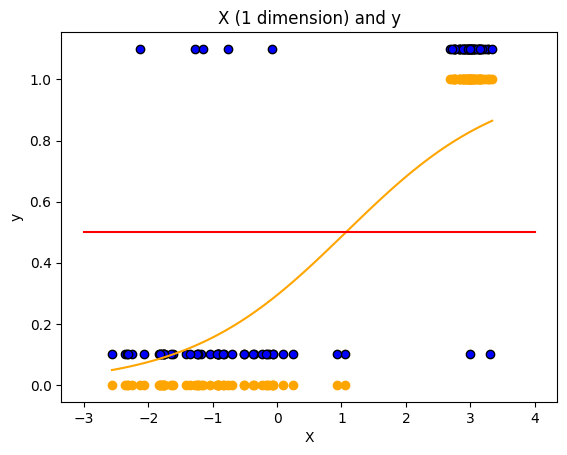

In [12]:
x_vals = np.linspace(X.min(), X.max(), 100)
sigmoid_vals = 1 / (1 + np.exp(-(model.coef_[0][0] * x_vals + model.intercept_[0])))
pred_classes = predict_class(model.coef_, model.intercept_, X.ravel())
plt.scatter(X, y+0.1, c='blue', edgecolor='k', label='True')
plt.scatter(X, pred_classes, c='orange', marker='o', label='Predicted')
plt.plot(x_vals, sigmoid_vals, c='orange', label='Fitted Sigmoid')
plt.plot([-3, 4], [0.5, 0.5], 'r-', label='Probability = 0.5')
plt.xlabel('X')
plt.ylabel('y')
plt.title('X (1 dimension) and y')
plt.show()
